# Week3: NN with one hidden layer

艾瑞指数：http://index.iresearch.com.cn/app

[SOURCE](https://hub.coursera-notebooks.org/user/kpnnhdgewrqxkvqxuykncn/notebooks/Week%203/Planar%20data%20classification%20with%20one%20hidden%20layer/Planar%20data%20classification%20with%20one%20hidden%20layer%20v4.ipynb#)

NBextensions: `conda install -c conda-forge jupyter_contrib_nbextensions`

## 1 - Pakages

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [18]:
#from testCases_v2 import *
# from planar_utils import plot_decision_boundary, sigmoid ,load_planar_dataset, load_extra_datasets

In [19]:
%matplotlib inline
np.random.seed(1) 

### `from package import * `
- `from math import *`

call all the function diretly with function name but `math.func`

In [7]:
from math import *
pi

3.141592653589793

In [8]:
import math
math.pi

3.141592653589793

In [15]:
pi?

## 2 - Dataset

### `np.linspace(a,b,n)`
`numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)` 
[Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
- 产生在a~b之间的等差数列，数量的n
- 默认包含b，第一数为a，最后一个数为b

### `np.c_[x, y]`
[Manual](https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html)<br>
short-hand for `np.r_['-1,2,0', index expression]`

### `axis=0 axis=1`
- `axis=0` 代表往跨行(down)
    - 使用0值表示沿着每一列或行标签\索引值向下执行方法
- `axis=1` 代表跨列(across)
    - 使用1值表示沿着每一行或者列标签模向执行对应的方法

In [20]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    
    for j in range(2):
        ix=range(N*j,N*(j+1))
        t=np.linspace(j*3.12,(j+1)*3.12,N)+np.random.randn(N)*0.2
        r=a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t),r*np.cos(t)]
        Y[ix] = j
    
    X=X.T
    Y=Y.T
    
    return X, Y    

In [21]:
X,Y = load_planar_dataset()

### `plt.scatter(...);`
- " `;` "屏蔽输出
- 在此处分号的功能类似于：`plt.show()`（前提可能是 `%matplotlib inline`）

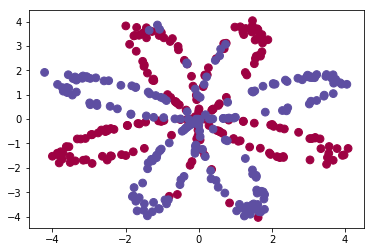

In [22]:
plt.scatter(X[0,:],X[1,:],c=Y,s=60,cmap=plt.cm.Spectral); 

In [23]:
shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]

## 3 - Simple Logistic Regression

### `np.flatten()`  VS   `np.ravel()`
- Collapse multi dimension array into one dimension, the shape of the returned array is `(a.size,)`
- `np.flatten()` return a copy
- `np.ravel()` return a veiw

[Refer](http://blog.csdn.net/lanchunhui/article/details/50354978)


In [24]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T.ravel());

In [25]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

### Caculate Accuracy
- `clf.predict(X.T)` return `0/1` pediction
- when caculate accuracy: `right_pricdictions/n_examples`
- Y and predictions are 0/1, 
    - `np.dot(Y, Y_predict)` get the number of right prediction for `Y=1`
    - `np.dot(1-Y, 1-Y_predict)` get the number of right prediction for `Y=0`

Accuracy of logistic regression: 47 % 


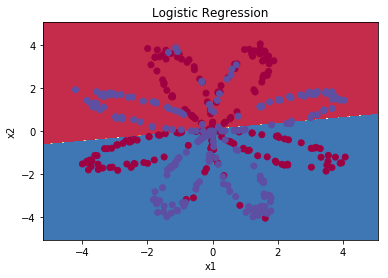

In [19]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y);
plt.title("Logistic Regression");

LR_predictions= clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ')

## 4 - Neural Networ model

### 4.1 - Structure definition

In [40]:
def layer_sizes(X,Y,n_h=4):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x,n_h, n_y )

### 4.2 - Initialize parameters

In [56]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 =np.zeros((n_y,1))
    
    parameters={'W1':W1,
                'b1':b1,
                'W2':W2,
                'b2':b2}
    return parameters

### 4.3 - The loop

In [69]:
def forward_propagation(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 =sigmoid(Z2)
    
    cache = {"Z1" : Z1,
             "A1" : A1,
             "Z2" : Z2,
             "A2" : A2}
    return A2, cache

In [86]:
def compute_cost(A2, Y, parameters):
    
    logrobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost=-np.mean(logrobs)
    
    return cost

#### 反向传播 `*.T`
- `forword_propagation` 时，矩阵点乘
- `forword_propagation` 时，某矩阵的转置点乘

In [88]:
def backward_propagation(parameters, cache, X, Y):
    m=X.shape[1]
    
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    dZ2 = A2 - Y
    dW2 = (np.dot(dZ2, A1.T)) / m
    db2 = (np.sum(dZ2, axis=1, keepdims=True)) / m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1,2))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [93]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### 4.4 - Integrade in nn_models

In [177]:
def nn_model(X, Y, n_h, num_iterations = 10000,learning_rate=1.2,print_cost=False):
    cost_list=[]
    np.random.seed(2)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X,parameters)
        cost = compute_cost(A2, Y, parameters)
        if i%100 ==0:
            cost_list.append(cost)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return parameters, cost_list

### 4.5 - Predictions

In [146]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions =(A2>0.5)
    
    return predictions

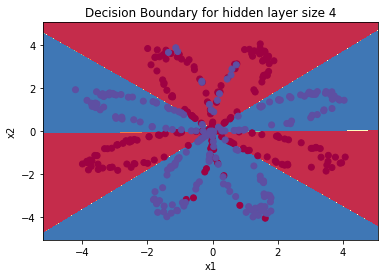

In [148]:
parameters, cost_list = nn_model(X, Y, n_h = 4, num_iterations = 10000,learning_rate=1.2, print_cost=False)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

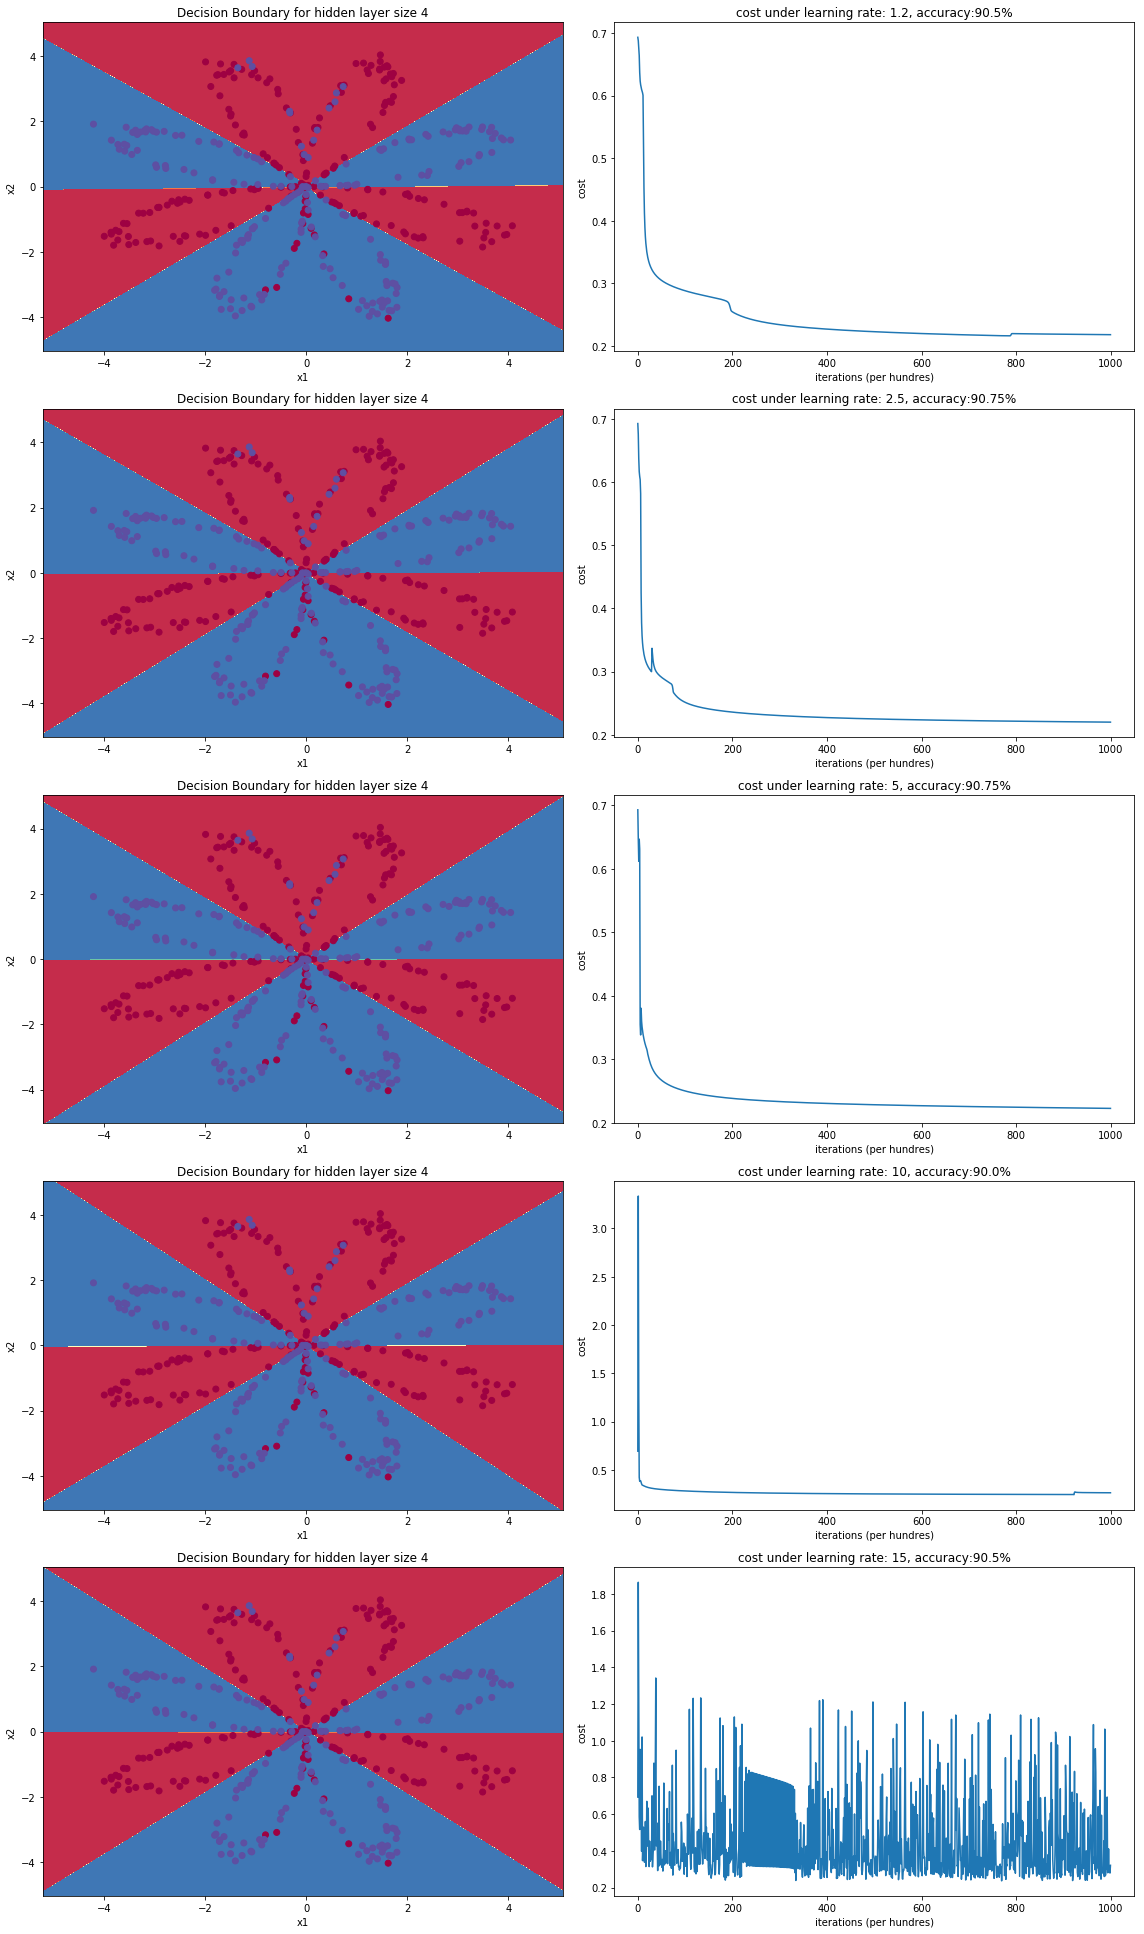

In [185]:
l_list= [1.2,2.5,5,10,15]
n = len(l_lsit)
i=1
plt.figure(figsize=(16, 48))
for learning_rate in l_list:
    parameters, cost_list = nn_model(X, Y, n_h = 4, num_iterations = 10000,learning_rate=learning_rate, print_cost=False)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    
    plt.subplot(n,2,i)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    plt.title("Decision Boundary for hidden layer size " + str(4))
    
    costs=np.squeeze(cost_list)
    i+=1
    plt.subplot(n,2,i)
    plt.plot(costs)
    plt.title("cost under learning rate: " + str(learning_rate)+ ", accuracy:" + str(accuracy) +"%")
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundres)')
    i+=1
plt.tight_layout()

In [174]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 87%


### 4.6 - Tuning hidden layer size

## Planar_utils

In [68]:
#planar_utils
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure